In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tmdb_data_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz", low_memory = False)
tmdb_data_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz", low_memory = False)

In [59]:
tmdb_data_2000.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.0,0.0,NaN
4,tt0116748,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


In [60]:
tmdb_data_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2186 entries, 0 to 2185
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2186 non-null   object 
 1   adult                  2185 non-null   float64
 2   backdrop_path          952 non-null    object 
 3   belongs_to_collection  131 non-null    object 
 4   budget                 2185 non-null   float64
 5   genres                 2185 non-null   object 
 6   homepage               87 non-null     object 
 7   id                     2185 non-null   float64
 8   original_language      2185 non-null   object 
 9   original_title         2185 non-null   object 
 10  overview               1984 non-null   object 
 11  popularity             2185 non-null   float64
 12  poster_path            1830 non-null   object 
 13  production_companies   2185 non-null   object 
 14  production_countries   2185 non-null   object 
 15  rele

In [61]:
test_df = [tmdb_data_2000, tmdb_data_2001]
df = pd.concat(test_df)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4439 entries, 0 to 2252
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4439 non-null   object 
 1   adult                  4437 non-null   float64
 2   backdrop_path          1908 non-null   object 
 3   belongs_to_collection  248 non-null    object 
 4   budget                 4437 non-null   float64
 5   genres                 4437 non-null   object 
 6   homepage               229 non-null    object 
 7   id                     4437 non-null   float64
 8   original_language      4437 non-null   object 
 9   original_title         4437 non-null   object 
 10  overview               4069 non-null   object 
 11  popularity             4437 non-null   float64
 12  poster_path            3721 non-null   object 
 13  production_companies   4437 non-null   object 
 14  production_countries   4437 non-null   object 
 15  rele

In [62]:
df.to_csv("Data/tmdb_results_combined.csv.gz", compression="gzip", index=False)

In [63]:
valid_financials = df[['title', 'budget', 'revenue']]

valid_financials_filtered = valid_financials.groupby(['budget', 'revenue'])

valid_financials_filtered.head()

,title,budget,revenue
1,The Fantasticks,10000000.0,0.0
2,For the Cause,0.0,0.0
3,Gang,0.0,0.0
4,Karobaar,0.0,0.0
5,In the Mood for Love,150000.0,12854953.0
...,...,...,...
2126,Citizen,500000.0,500000.0
2154,Instant Karma,114263.0,0.0
2206,Toaster,2000.0,0.0
2226,Mi crimen al desnudo,11.0,0.0


In [64]:
budget_filter = df['budget'] > 0
revenue_filter = df['revenue'] >0

In [65]:
valid_financials = df.loc[budget_filter | revenue_filter, :]
valid_financials.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
5,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.105,1950.0,PG
7,tt0119273,0.0,/fClJrAmJQ90zg9gWnfHVYSMiDTv.jpg,"{'id': 141086, 'name': 'Heavy Metal Collection...",15000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,16225.0,en,Heavy Metal 2000,...,0.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,not to survive the fight in the external world...,Heavy Metal 2000,0.0,6.068,155.0,R
13,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,...,80334.0,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.242,215.0,NaN
14,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.400,42.0,R


In [66]:
valid_financials['title'].value_counts().sum()

716

<AxesSubplot:>

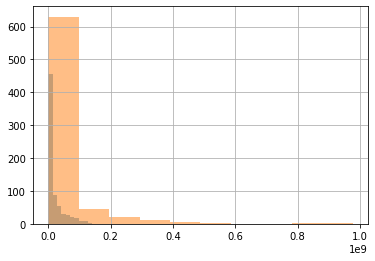

In [67]:
valid_financials['budget'].hist(alpha =0.5)
valid_financials['revenue'].hist(alpha = 0.5)

In [68]:
financials_amounts = valid_financials['certification'].value_counts()
financials_amounts

R        229
PG-13    131
PG        35
NR        17
G         15
NC-17      1
Name: certification, dtype: int64

<AxesSubplot:>

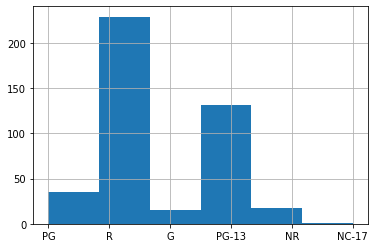

In [69]:
valid_financials['certification'].hist(bins = 6)

In [70]:
valid_financials_R = valid_financials['certification'] == 'R'

new_df = valid_financials.loc[valid_financials_R]

avg_rev = new_df['revenue'].mean()

print(avg_rev)

avg_budget = new_df['budget'].mean()

print(avg_budget)

33116060.52838428
20123790.152838428


In [71]:
valid_financials_PG_13 = valid_financials['certification'] == 'PG-13'


new_df2 = valid_financials.loc[valid_financials_PG_13]

avg_rev = new_df2['revenue'].mean()

print(avg_rev)

avg_budget = new_df2['budget'].mean()

print(avg_budget)

98939768.09160306
43155785.70229007


In [72]:
valid_financials_PG = valid_financials['certification'] == 'PG'


new_df3 = valid_financials.loc[valid_financials_PG]

avg_rev = new_df3['revenue'].mean()

print(avg_rev)

avg_budget = new_df3['budget'].mean()

print(avg_budget)

112337845.05714285
44978571.68571428


In [73]:
valid_financials_NR = valid_financials['certification'] == 'NR'


new_df4 = valid_financials.loc[valid_financials_NR]

avg_rev = new_df4['revenue'].mean()

print(avg_rev)

avg_budget = new_df4['budget'].mean()

print(avg_budget)

8887618.88235294
6300005.529411765


In [75]:
valid_financials_G = valid_financials['certification'] == 'G'


new_df5 = valid_financials.loc[valid_financials_G]

avg_rev = new_df5['revenue'].mean()

print(avg_rev)

avg_budget = new_df5['budget'].mean()

print(avg_budget)

115461310.93333334
38223578.4


In [76]:
valid_financials_NC_17 = valid_financials['certification'] == 'NC-17'

new_df6 = valid_financials.loc[valid_financials_NC_17]

avg_rev = new_df6['revenue'].mean()

print(avg_rev)

avg_budget = new_df6['budget'].mean()

print(avg_budget)

11678.0
0.0


<AxesSubplot:>

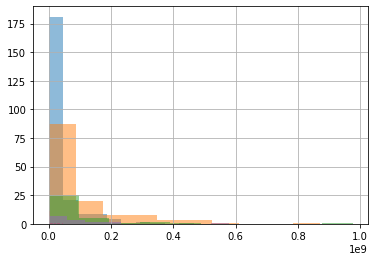

In [78]:
new_df['revenue'].hist(alpha = 0.5)
new_df2['revenue'].hist(alpha = 0.5)
new_df3['revenue'].hist(alpha = 0.5)
new_df4['revenue'].hist(alpha = 0.5)
new_df5['revenue'].hist(alpha = 0.5)
new_df6['revenue'].hist(alpha = 0.5)

<AxesSubplot:>

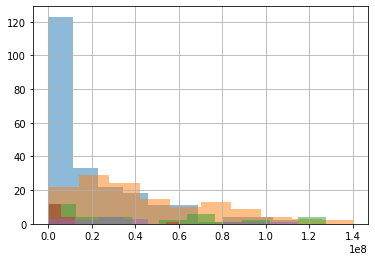

In [79]:
new_df['budget'].hist(alpha = 0.5)
new_df2['budget'].hist(alpha = 0.5)
new_df3['budget'].hist(alpha = 0.5)
new_df4['budget'].hist(alpha = 0.5)
new_df5['budget'].hist(alpha = 0.5)
new_df6['budget'].hist(alpha = 0.5)